<a href="https://colab.research.google.com/github/RamomNF/GoogleColab/blob/master/one_hot_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#'Criei esse script com o objetivo de gerar alguns exemplos mostrando a diferença
#'entre alguns tipos de codificação de variáveis categóricas. O resultado virou
#'uma publicação no medium. https://medium.com/@ramomnf/j%C3%A1-ouviu-falar-em-one-hot-encoding-160ba361a157

In [6]:
#Primeiro as libs que utilizarei
#install.packages("tidyverse")
#install.packages("latex2exp")
library("tidyverse")
library("latex2exp")

In [4]:
#####################################################################
#                                                                   #
###                                                               ###
#####                 BLOCO 01: Gerando os dados                #####
###                                                               ###
#                                                                   #
#####################################################################

In [7]:
#'A ideia é ter uma função linear mais um erro para usar de processo
#'gerador para a variável resposta.
arvA <- function(x, a){
  y = a + 0.25*x
  y = y + rnorm(1, 0, sqrt(y)/10)
  return(y)
}


#'Vou fixar uma semente aleatória e gerar o conjunto de dados.
#'Estou gerando 150 observações para cada espécie de árvore com 
#'idades entre 5 e 30, todas com igual probabilidade de amostragem
set.seed(137408)
Ax <- sample(5:30, 150, replace = TRUE)
Bx <- sample(5:30, 150, replace = TRUE)
Cx <- sample(5:30, 150, replace = TRUE)
Dx <- sample(5:30, 150, replace = TRUE)
Ay <- sapply(Ax, arvA, a=2)
By <- sapply(Bx, arvA, a=4)
Cy <- sapply(Cx, arvA, a=6.5)
Dy <- sapply(Dx, arvA, a=9.5)

#Sintetizo todos os dados gerados em um data.frame
arvores <- data.frame(idade   = c(Ax, Bx, Cx, Dx),
                      altura  = c(Ay, By, Cy, Dy),
                      especie = rep(c("A", "B", "C", "D"), each=150))

In [8]:
#####################################################################
#                                                                   #
###                                                               ###
#####                  BLOCO 02: Gráfico Base                   #####
###                                                               ###
#                                                                   #
#####################################################################

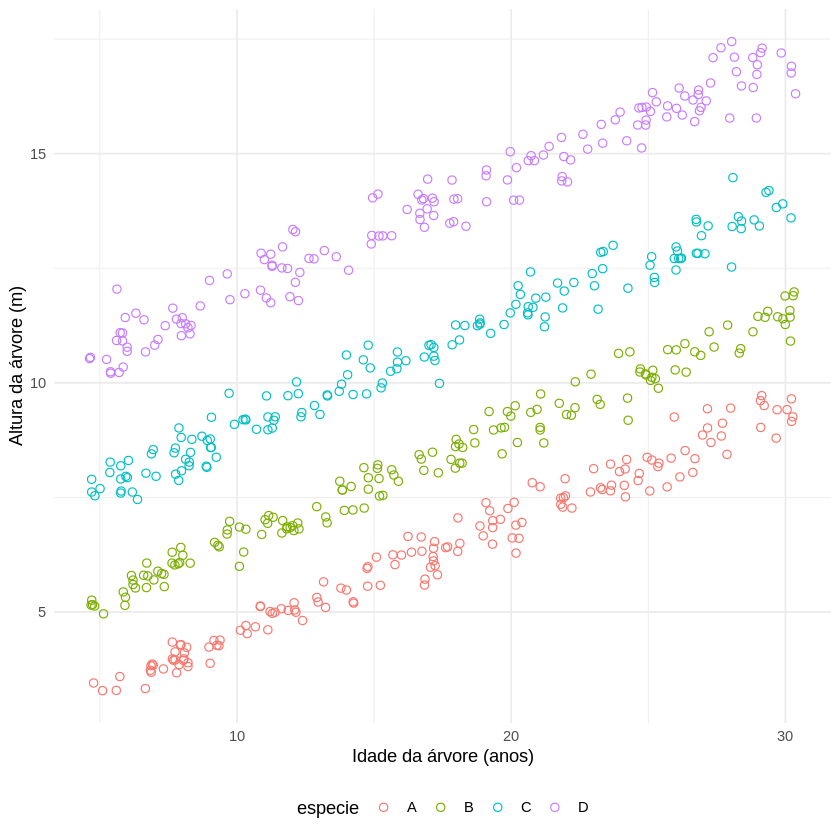

In [9]:
#'Esse vai ser o esqueleto dos gráficos.
#'Fundo simples com os pontos formando uma reta.
#'Como o interesse são os conceitos de codificação,
#'para ficar mais bonita a dispersão dos dados usarei jitter
ggarvore =
  arvores %>% 
  ggplot() +
  aes(x=idade, y=altura, colour=especie) +
  geom_jitter(shape=1, size=2) +  
  xlab("Idade da árvore (anos)") +
  ylab("Altura da árvore (m)") +
  theme_minimal() +
  theme(legend.position = "bottom")

ggarvore

In [10]:
#####################################################################
#                                                                   #
###                                                               ###
#####             BLOCO 03: Codificações de Variável            #####
###                                                               ###
#                                                                   #
#####################################################################

In [11]:
#'Aqui eu poderia trabalhar com matriz de contraste dentro do lm,
#'mas preferi fazer o processo de codificação direto nos dados,
#'pois é mais fácil entender o que está acontecendo com cada nível.


#'Codificação de MÉDIA DAS CASELAS
#'Equivale ao one-hot-encoding. Cada categoria possui um efeito
#'próprio indicado por 0 ou 1.
arvores_medcas =
  arvores %>%
  mutate(dummy=1) %>%
  pivot_wider(values_from = dummy,
              values_fill = 0,
              names_from  = especie,
              names_prefix="especie")


#'Codificação de CASELA DE REFERÊNCIA
#'A espécie A foi "incorporada ao intercepto" e as demais categorias
#'de espécie vão apresentar valores 0 e 1.
arvores_casref =
  arvores %>%
  mutate(dummy=if_else(especie == "A",0,1)) %>%
  pivot_wider(values_from = dummy,
              values_fill = 0,
              names_from  = especie,
              names_prefix="especie")


#'Codificação de EFEITO DIFERENCIAL
#'Conseguimos ver o efeito de cada categoria de espécie em relação
#'À média das categorias, vamos utilizar os valores -1, 0 e 1.
arvores_efedif =
  arvores %>%
  mutate(dummy=if_else(especie == "D",-1,1)) %>%
  pivot_wider(values_from = dummy,
              values_fill = 0,
              names_from  = especie,
              names_prefix="especie") %>% 
  mutate(especieA = especieA + especieD,
         especieB = especieB + especieD,
         especieC = especieC + especieD)

In [12]:
#####################################################################
#                                                                   #
###                                                               ###
#####                BLOCO 04: Ajuste de Modelos                #####
###                                                               ###
#                                                                   #
#####################################################################

In [13]:
#Modelo de Regressão Linear com Variável Categórica em codificação de MÉDIA DAS CASELAS
model_medcas = lm(altura ~ -1 + idade + especieA + especieB + especieC + especieD, data=arvores_medcas)

#Modelo de Regressão Linear com Variável Categórica em codificação de CASELA DE REFERÊNCIA
model_casref = lm(altura ~      idade +            especieB + especieC + especieD, data=arvores_casref)

#Modelo de Regressão Linear com Variável Categórica em codificação de EFEITO DIFERENCIAL
model_efedif = lm(altura ~      idade + especieA + especieB + especieC,            data=arvores_efedif)

In [18]:
#####################################################################
#                                                                   #
###                                                               ###
#####              BLOCO 05: Gráficos com Equações              #####
###                                                               ###
#                                                                   #
#####################################################################

In [ ]:
#'Aqui quero mostrar que é possível recriar as retas com base no modelos
#'e que as fórmulas plotadas nos gráficos batem com a fórmula usada

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


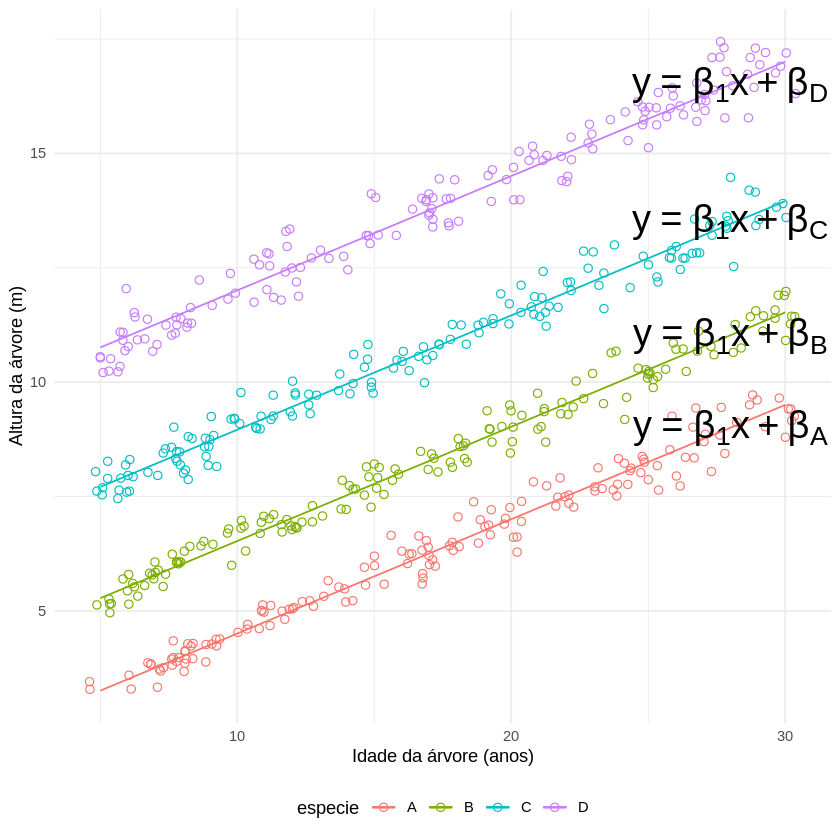

In [22]:
x = 5:30
medcas_coef = model_medcas$coefficients
al = medcas_coef[1]*x + medcas_coef[2]
bl = medcas_coef[1]*x + medcas_coef[3]
cl = medcas_coef[1]*x + medcas_coef[4]
dl = medcas_coef[1]*x + medcas_coef[5]

#As fórmulas em latex vão dar alguns warnings
ggarvore +
  geom_line(data=data.frame(x, al, especie="A"), aes(x=x, y=al)) +
  geom_line(data=data.frame(x, bl, especie="B"), aes(x=x, y=bl)) +
  geom_line(data=data.frame(x, cl, especie="C"), aes(x=x, y=cl)) +
  geom_line(data=data.frame(x, dl, especie="D"), aes(x=x, y=dl)) +
  ggplot2::annotate("text", 28, 9,    label=TeX("$y = \\beta_{1} x + \\beta_{A}$"), size = 8) +
  ggplot2::annotate("text", 28, 11,   label=TeX("$y = \\beta_{1} x + \\beta_{B}$"), size = 8) +
  ggplot2::annotate("text", 28, 13.5, label=TeX("$y = \\beta_{1} x + \\beta_{C}$"), size = 8) +
  ggplot2::annotate("text", 28, 16.5, label=TeX("$y = \\beta_{1} x + \\beta_{D}$"), size = 8)

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


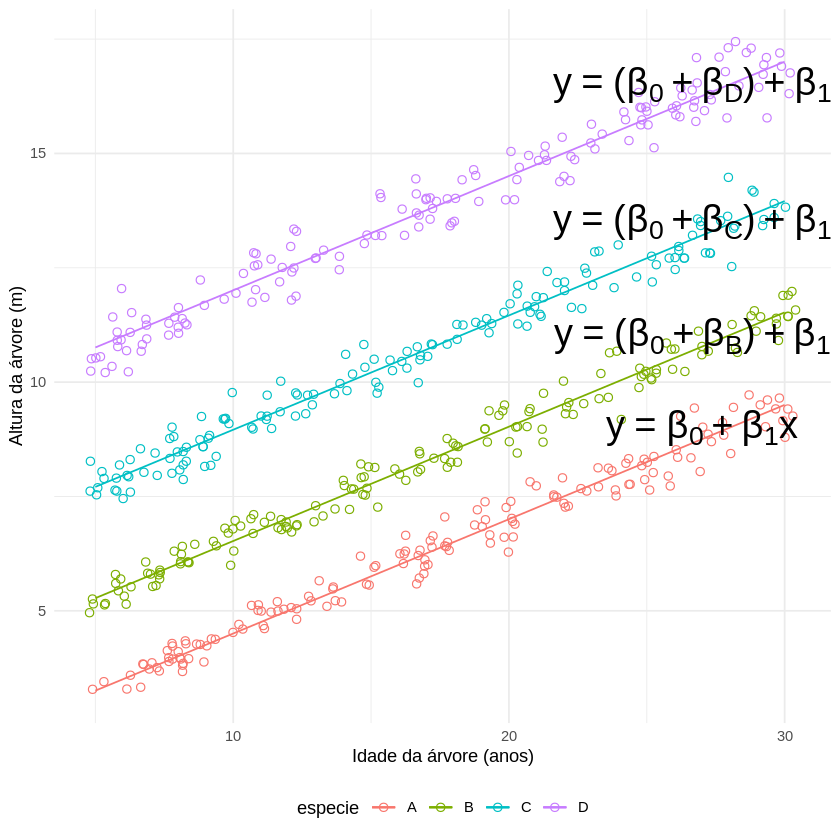

In [23]:
#x = 5:30
casref_coef = model_casref$coefficients
al = casref_coef[1] + casref_coef[2]*x
bl = casref_coef[1] + casref_coef[2]*x + casref_coef[3]
cl = casref_coef[1] + casref_coef[2]*x + casref_coef[4]
dl = casref_coef[1] + casref_coef[2]*x + casref_coef[5]

#As fórmulas em latex vão dar alguns warnings
ggarvore +
  geom_line(data=data.frame(x, al, especie="A"), aes(x=x, y=al)) +
  geom_line(data=data.frame(x, bl, especie="B"), aes(x=x, y=bl)) +
  geom_line(data=data.frame(x, cl, especie="C"), aes(x=x, y=cl)) +
  geom_line(data=data.frame(x, dl, especie="D"), aes(x=x, y=dl)) +
  ggplot2::annotate("text", 27, 9,    label=TeX("$y = \\beta_{0} + \\beta_{1} x$"), size = 8) +
  ggplot2::annotate("text", 27, 11,   label=TeX("$y = (\\beta_{0} + \\beta_{B} ) + \\beta_{1} x$"), size = 8) +
  ggplot2::annotate("text", 27, 13.5, label=TeX("$y = (\\beta_{0} + \\beta_{C} ) + \\beta_{1} x$"), size = 8) +
  ggplot2::annotate("text", 27, 16.5, label=TeX("$y = (\\beta_{0} + \\beta_{D} ) + \\beta_{1} x$"), size = 8)


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


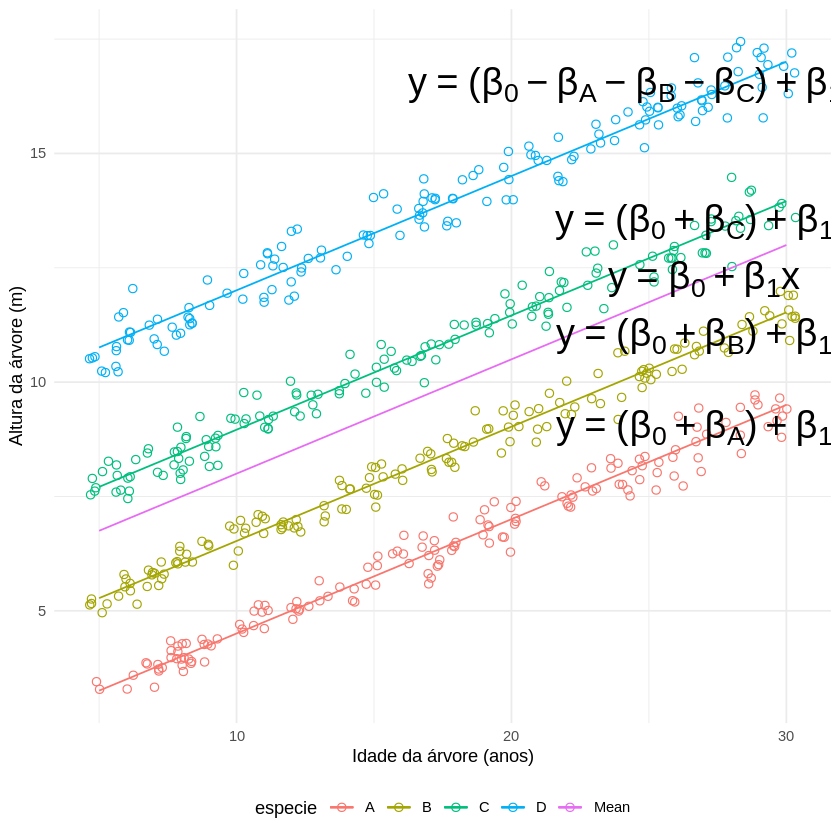

In [24]:
#x = 5:30
efedif_coef = model_efedif$coefficients
il = efedif_coef[1] + efedif_coef[2]*x
al = efedif_coef[1] + efedif_coef[2]*x + efedif_coef[3]
bl = efedif_coef[1] + efedif_coef[2]*x + efedif_coef[4]
cl = efedif_coef[1] + efedif_coef[2]*x + efedif_coef[5]
dl = efedif_coef[1] + efedif_coef[2]*x - efedif_coef[3] - efedif_coef[4] - efedif_coef[5]

#As fórmulas em latex vão dar alguns warnings
ggarvore +
  geom_line(data=data.frame(x, al, especie="A"), aes(x=x, y=al)) +
  geom_line(data=data.frame(x, bl, especie="B"), aes(x=x, y=bl)) +
  geom_line(data=data.frame(x, cl, especie="C"), aes(x=x, y=cl)) +
  geom_line(data=data.frame(x, dl, especie="D"), aes(x=x, y=dl)) +
  geom_line(data=data.frame(x, il, especie="Mean"), aes(x=x, y=il)) +
  ggplot2::annotate("text", 27, 9,      label=TeX("$y = (\\beta_{0} + \\beta_{A} ) + \\beta_{1} x$"), size = 8) +
  ggplot2::annotate("text", 27, 11,     label=TeX("$y = (\\beta_{0} + \\beta_{B} ) + \\beta_{1} x$"), size = 8) +
  ggplot2::annotate("text", 27, 13.5,   label=TeX("$y = (\\beta_{0} + \\beta_{C} ) + \\beta_{1} x$"), size = 8) +
  ggplot2::annotate("text", 24.5, 16.5, label=TeX("$y = (\\beta_{0} - \\beta_{A} - \\beta_{B} - \\beta_{C}) + \\beta_{1} x$"), size = 8) +
  ggplot2::annotate("text", 27, 12.25,  label=TeX("$y = \\beta_{0} + \\beta_{1} x$"), size = 8)

